In [1]:
# Ricordati di eseguire questa cella 
import sys;
sys.path.append('../../'); 
import jupman;

# Analisi dei dati - soluzioni

Oggi affronteremo il tema dell'analisi dati in Python:

* analisi dati con libreria Pandas
* plotting con MatPlotLib
* Esempi con dataset AstroPi
* Esercizi con dataset meteotrentino
* mappa regioni italiane con GeoPandas



## 1. Introduzione


Python mette a disposizione degli strumenti potenti per l'analisi dei dati:

![](pydata.png)

Uno di questi è [Pandas](https://pandas.pydata.org/), che fornisce strutture di dati veloci e flessibili, soprattutto per l'analisi dei dati in tempo reale.

Installiamolo subito:

Anaconda:

- `conda install pandas`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user pandas ```


## 2. Analisi dei dati di Astro Pi


Proviamo ad analizzare i dati registrati dal Raspberry presente sulla Stazione Spaziale Internazionale, scaricati da qui:

[raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet](https://www.raspberrypi.org/learning/astro-pi-flight-data-analysis/worksheet/)

su cui è possibile trovare la descrizione dettagliata dei dati raccolti dai sensori, nel mese di febbraio 2016 (un record ogni 10 secondi).

**DOMANDA**: Che licenza hanno i dati ? Riesci a trovarla da qualche parte ?   

![](International_Space_Station_exploded_diagram_large.jpg)

Il metodo ```read_csv``` importa i dati da un file CSV e li memorizza in una struttura DataFrame.

In questo esercizio useremo il file [Columbus_Ed_astro_pi_datalog.csv](Columbus_Ed_astro_pi_datalog.csv)

In [2]:
import pandas as pd   # importiamo pandas e per comodità lo rinominiamo in  'pd'
import numpy as np    # importiamo numpy e per comodità lo rinominiamo in 'np'

# ricordatevi l'encoding !
df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 20 columns):
ROW_ID        110869 non-null int64
temp_cpu      110869 non-null float64
temp_h        110869 non-null float64
temp_p        110869 non-null float64
humidity      110869 non-null float64
pressure      110869 non-null float64
pitch         110869 non-null float64
roll          110869 non-null float64
yaw           110869 non-null float64
mag_x         110869 non-null float64
mag_y         110869 non-null float64
mag_z         110869 non-null float64
accel_x       110869 non-null float64
accel_y       110869 non-null float64
accel_z       110869 non-null float64
gyro_x        110869 non-null float64
gyro_y        110869 non-null float64
gyro_z        110869 non-null float64
reset         110869 non-null int64
time_stamp    110869 non-null object
dtypes: float64(17), int64(2), object(1)
memory usage: 16.9+ MB


Possiamo vedere rapidamente righe e colonne del dataframe con l'attributo `shape`:

**NOTA**: `shape` non è seguito da parentesi tonde !

In [3]:
df.shape

(110869, 20)

Il metodo `describe` vi da al volo tutta una serie di dati di riepilogo:

* il conteggio delle righe
* la media
* [la deviazione standard](https://it.wikipedia.org/wiki/Scarto_quadratico_medio)
* [i quartili](https://it.wikipedia.org/wiki/Quantile)
* minimo e massimo

In [4]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**DOMANDA**: Manca qualche campo alla tabella prodotta da describe? Perchè non l'ha incluso ? 

Per limitare `describe` ad una sola colonna come `humidity`, puoi scrivere così:

In [5]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

Ancora più comodamente, puoi usare la notazione con il punto:

In [6]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

**ATTENZIONE**: Nel caso il nome del campo avesse degli spazi (es. `'rotazioni frullatore'`), **non** potreste usare la notazione con il punto ma sareste costretti ad usare la notazione con le quadre vista sopra  (es: `df.['rotazioni frullatore'].describe()`)

Il metodo `head` restituisce i primi dataset:

In [7]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


Il metodo `tail` restituisce gli ultimi dataset:

In [8]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


La proprietà `colums` restituisce le intestazioni di colonna:

In [9]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

**Nota**: Come si vede qua sopra, il tipo dell'oggetto ritornato non è una lista, ma un contenitore speciale definito da pandas:

In [10]:
type(df.columns)

pandas.core.indexes.base.Index

Ciononostante, possiamo accedere agli elementi di questo contenitore usando indici dentro le parentesi quadre:

In [11]:
df.columns[0]

'ROW_ID'

In [12]:
df.columns[1]

'temp_cpu'

**2.1 DA FARE**: Creare un nuovo dataframe chiamato ```meteo``` importando i dati dal file meteo.csv, che contiene i dati meteo di Trento di novembre 2017 (fonte: https://www.meteotrentino.it). **IMPORTANTE**: assegna il dataframe ad una variabile chiamata `meteo` (così evitiamo confusione con il dataframe dell'AstroPi)

**2.2 DA FARE**: Visualizzare le informazioni relative a questo Dataframe.

In [13]:
# scrivi qui - crea il dataframe

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
print("COLUMNS:")
print()
print(meteo.columns)
print()
print("INFO:")
print(meteo.info())
print()
print("HEAD():")

meteo.head()


COLUMNS:

Index(['Data', 'Pressione', 'Pioggia', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
Data         2878 non-null object
Pressione    2878 non-null float64
Pioggia      2878 non-null float64
Temp         2878 non-null float64
dtypes: float64(3), object(1)
memory usage: 90.0+ KB
None

HEAD():


,Data,Pressione,Pioggia,Temp
0,01/11/2017 00:00,995.4,0.0,5.4
1,01/11/2017 00:15,995.5,0.0,6.0
2,01/11/2017 00:30,995.5,0.0,5.9
3,01/11/2017 00:45,995.7,0.0,5.4
4,01/11/2017 01:00,995.7,0.0,5.3


## 3. Indicizzazione, filtraggio e ordinamento


Per ottenere la i-esima serie si utilizza il metodo `iloc[i]` (qui riusiamo il dataset dell'AstroPI) :

In [14]:
df.iloc[6]

ROW_ID                          7
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                    -50.4473
mag_y                    -7.93731
mag_z                    -12.1886
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
time_stamp    2016-02-16 10:45:41
Name: 6, dtype: object

&Egrave; possibile selezionare un dataframe di posizioni contigue, utilizzando lo _slicing_ (vedere [libro Pensare in Python](https://davidleoni.github.io/ThinkPythonItalian/html/thinkpython2009.html#sec98)).

Qua per esempio selezioniamo le righe dalla 5 _inclusa_ alla 7 _esclusa_ :

In [15]:
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


&Egrave; possibile filtrare i dati in base al soddisfacimento di una condizione.

Possiamo scoprire che tipo di dato &egrave; ad esempio ```df.ROW_ID >= 6```:

In [16]:
type(df.ROW_ID >= 6)

pandas.core.series.Series

Cosa contiene questo oggetto `Series` ? Se proviamo a stamparlo vedremo che si tratta di una serie di valori Vero o Falso, a seconda se il valore di ROW_ID è maggiore o uguale a 6:

In [17]:
df.ROW_ID >= 6

0         False
1         False
2         False
3         False
4         False
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110839     True
110840     True
110841     True
110842     True
110843     True
110844     True
110845     True
110846     True
110847     True
110848     True
110849     True
110850     True
110851     True
110852     True
110853     True
110854     True
110855     True
110856     True
110857     True
110858     True
110859     True
110860     True
110861     True
110862     True
110863     True
110864     True
110865     True
110866     True
110867     True
110868     True
Name: ROW_ID, Length: 11

In modo analogo `(df.ROW_ID >= 6) & (df.ROW_ID <= 10)` è una serie di valori Vero o Falso, se ROW_ID è contemporaneamente maggiore o uguale a 6 e minore e uguale a 10.

In [18]:
type((df.ROW_ID >= 6) & (df.ROW_ID <= 10))

pandas.core.series.Series

Se vogliamo le righe complete del dataframe che soddisfano la condizione, possiamo scrivere così: 

<div class="alert alert-warning">

**IMPORTANTE**:  usiamo `df` all'_esterno_ dell'espressione `df[     ]` iniziando e chiudendo con le parentesi quadrate per dire a Python che vogliamo filtrare sul dataframe `df`, e usiamo di nuovo `df` all'_interno_ delle quadre per indicare su _quali colonne_ e _quali righe_ vogliamo filtrare 

</div>

In [19]:
df[  (df.ROW_ID >= 6) & (df.ROW_ID <= 10)  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,-7.762600,-12.284196,-0.000523,0.019473,0.014298,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,-7.262934,-11.981090,-0.000522,0.019385,0.014286,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,-6.875270,-11.672494,-0.000581,0.019390,0.014441,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10


Quindi se cerchiamo il record in cui la pressione è massima, utilizziamo la proprietà ```values``` della serie su cui calcoliamo il valore massimo:

In [20]:
df[  (df.pressure == df.pressure.values.max())  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20


Il metodo `sort_values` ritorna un dataframe ordinato in base a una o più colonne:

In [21]:
df.sort_values('pressure',ascending=False).head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20
77601,77602,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0,2016-02-25 12:13:10
77603,77604,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0,2016-02-25 12:13:30
77604,77605,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0,2016-02-25 12:13:40
77608,77609,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0,2016-02-25 12:14:20


La properietà `loc` ci permette di filtrare righe secondo una proprietà e selezionare una colonna, che può essere anche nuova. In questo caso, per le righe dove la temperatura cpu è eccessiva, scriviamo il valore `True` nei campi della colonna con intestazione `'Too hot'`:

In [22]:
df.loc[(df.temp_cpu > 31.68),'Too hot'] = True 

Vediamo la tabella risultante (scorri fino in fondo per vedere la nuova colonna). Notiamo come i valori delle righe che non abbiamo filtrato vengono rappresentati con  `NaN`, che letteralmente significa _not a number_ : 

In [23]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,True
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,True
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,True
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,NaN


Pandas è una libreria molto flessibile, e fornisce diversi modi per ottenere gli stessi obbiettivi. Per esempio, possiamo effettuare la stessa operazione di sopra con il comando `np.where` come qua sotto. Ad esempio, aggiungiamo una colonna che mi dice se la pressione è sopra o sotto la media.

In [24]:
pressione_media = df.pressure.values.mean()
df['check_p'] = np.where(df.pressure <= pressione_media, 'sotto', 'sopra')

**DA FARE 3.1**: Analizzare i dati del Dataframe ```meteo``` e trovare:

* i valori di pressione media, minima e massima
* la temperatura media
* le date delle giornate di pioggia


In [25]:
# scrivi qui
print("Media pressione : %s" % meteo.Pressione.values.mean())
print("Minimo pressione : %s" % meteo.Pressione.values.min())
print("Massimo pressione : %s" % meteo.Pressione.values.max())
print("Media temperatura : %s" % meteo.Temp.values.mean())
meteo[(meteo.Pioggia > 0)]

Media pressione : 986.340826963
Minimo pressione : 966.3
Massimo pressione : 998.3
Media temperatura : 6.4107018763


,Data,Pressione,Pioggia,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
439,05/11/2017 13:45,978.8,0.4,8.2
440,05/11/2017 14:00,978.7,0.8,8.2
441,05/11/2017 14:15,978.4,0.6,8.3
442,05/11/2017 14:30,978.2,0.6,8.2
443,05/11/2017 14:45,978.1,0.6,8.2


## 4. Rivediamo MatPlotLib

Abbiamo già visto MatplotLib nella parte [sulla visualizzazione](http://softpython.readthedocs.io/it/latest/exercises/visualization/visualization-solution.html), e oggi lo useremo [Matplotlib](http://matplotlib.org) per disegnare i dati.

Riprendiamo un esempio, usando l'approccio in _stile Matlab_. Plotteremo una retta passando due liste di coordinate, una per le x e una per le y:

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

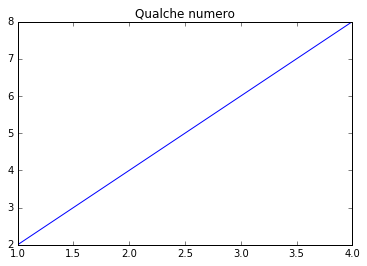

In [27]:

x = [1,2,3,4]
y = [2,4,6,8]
plt.plot(x, y) # possiamo direttamente passare liste per le x e y
plt.title('Qualche numero')
plt.show()


Possiamo anche creare serie con numpy. Proviamo a fare una parabola:

In [28]:
x = np.arange(0.,5.,0.1)
#  '**' è l'operatore di elevamento a potenza in Python, NON '^'
y = x**2  

Utilizziamo la funzione `type` per capire che tipo di dati sono x e y:

In [29]:
type(x)

numpy.ndarray

In [30]:
type(y)

numpy.ndarray

Si tratta quindi di vettori di NumPy.

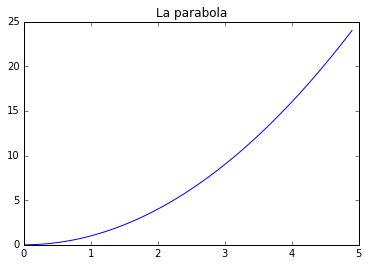

In [31]:
plt.title('La parabola')
plt.plot(x,y);

Se vogliamo che le unità dell'asse x siano della stessa dimensione di quelle dell'asse y, possiamo utilizzare la funzione [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)

Per settare i limiti delle x e delle y, possiamo usare `xlim` e `ylim`:

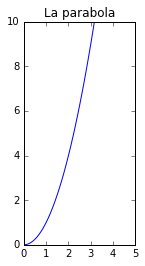

In [32]:
plt.xlim([0, 5])
plt.ylim([0,10])
plt.title('La parabola')

plt.gca().set_aspect('equal')
plt.plot(x,y);



### Grafici matplotlib da strutture pandas

Si possono ricavare grafici direttamente da strutture pandas, sempre usando lo _stile matlab_. Qua c'è la documentazione di [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) Facciamo un esempio. In caso di un numero molto elevato di dati, può essere utile avere un'idea qualitativa dei dati, mettendoli in grafico:

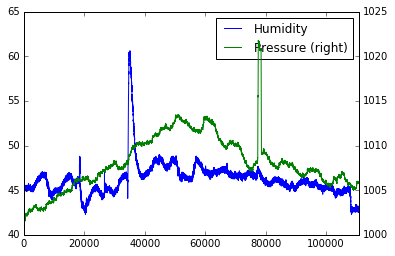

In [33]:
df.humidity.plot(label="Humidity", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

Proviamo a mettere valori di pressione sull'asse orizzontale, e vedere quali valori di umidità sull'asse verticale corrispondono ad una certa pressione:

/home/da/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


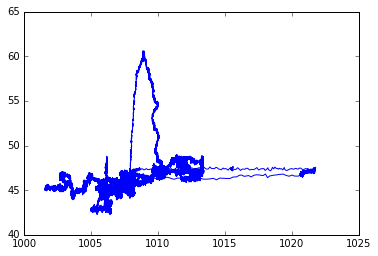

In [34]:
plt.plot(df['pressure'], df['humidity'])

Selezioniamo nel nuovo dataframe `df2` le righe tra la 12500esima (inclusa) e la 15000esima (esclusa): 

In [35]:
df2=df.iloc[12500:15000]

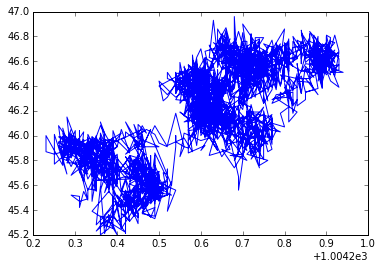

In [36]:
plt.plot(df2['pressure'], df2['humidity'])

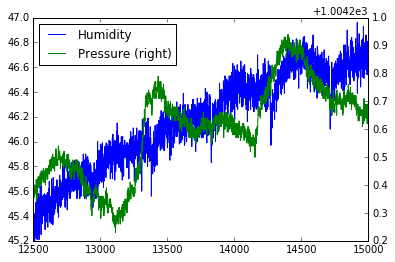

In [37]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)

Il metodo `corr` permette di calcolare la correlazione tra le colonne del DataFrame.

In [38]:
df2.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
ROW_ID,1.000000,0.561540,0.636899,0.730764,0.945210,0.760732,0.005633,0.266995,0.172192,-0.108713,0.057601,-0.270656,0.015936,0.121838,0.075160,-0.014346,-0.026012,0.011714,NaN
temp_cpu,0.561540,1.000000,0.591610,0.670043,0.488038,0.484902,0.025618,0.165540,0.056950,-0.019815,-0.028729,-0.193077,-0.021093,0.108878,0.065628,-0.019478,-0.007527,-0.006737,NaN
temp_h,0.636899,0.591610,1.000000,0.890775,0.539603,0.614536,0.022718,0.196767,-0.024700,-0.151336,0.031512,-0.260633,-0.009408,0.173037,0.129074,-0.005255,-0.017054,-0.016113,NaN
temp_p,0.730764,0.670043,0.890775,1.000000,0.620307,0.650015,0.019178,0.192621,0.007474,-0.060122,-0.039648,-0.285640,-0.034348,0.187457,0.144595,-0.010679,-0.016674,-0.017010,NaN
humidity,0.945210,0.488038,0.539603,0.620307,1.000000,0.750000,0.012247,0.231316,0.181905,-0.108781,0.131218,-0.191957,0.040452,0.069717,0.021627,0.005625,-0.001927,0.014431,NaN
pressure,0.760732,0.484902,0.614536,0.650015,0.750000,1.000000,0.037081,0.225112,0.070603,-0.246485,0.194611,-0.173808,0.085183,-0.032049,-0.068296,-0.014838,-0.008821,0.032056,NaN
pitch,0.005633,0.025618,0.022718,0.019178,0.012247,0.037081,1.000000,0.068880,0.030448,-0.008220,-0.002278,-0.019085,0.024460,-0.053634,-0.029345,0.040685,0.041674,-0.024081,NaN
roll,0.266995,0.165540,0.196767,0.192621,0.231316,0.225112,0.068880,1.000000,-0.053750,-0.281035,-0.479779,-0.665041,0.057330,-0.049233,-0.153524,0.139427,0.134319,-0.078113,NaN
yaw,0.172192,0.056950,-0.024700,0.007474,0.181905,0.070603,0.030448,-0.053750,1.000000,0.536693,0.300571,0.394324,-0.028267,0.078585,0.068321,-0.021071,-0.009650,0.064290,NaN
mag_x,-0.108713,-0.019815,-0.151336,-0.060122,-0.108781,-0.246485,-0.008220,-0.281035,0.536693,1.000000,0.046591,0.475674,-0.097520,0.168764,0.115423,-0.017739,-0.006722,0.008456,NaN


## Calcolare nuove colonne

E' possibile ottenere nuove colonne effettuando calcoli da campi di altri colonne in modo molto naturale. Per esempio, qua ricaviamo la nuova colonna `mag_tot`, cioè il campo magnetico assoluto rilevato dalla stazione spaziale ricavandolo a partire da `mag_x`, `mag_y`, e `mag_z`, e poi la plottiamo:

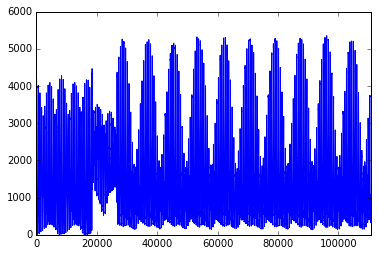

In [39]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2
df.mag_tot.plot()

Troviamo dove il campo magnetico era al massimo: 

In [40]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

Inserendo il valore trovato sul sito [isstracker.com/historical](http://www.isstracker.com/historical), possiamo rilevare le posizioni in cui il campo magnetico è più forte.

## Filtrare per valori testuali

Ci sono vari modi per filtrare in base a testo ([vedi documentazione](https://pandas.pydata.org/pandas-docs/stable/text.html)), qua facciamo solo un esempio. Quando vogliamo filtrare per valori testuali, possiamo usare `.str.contains`, qua per esempio selezioniamo tutte le rilevazioni degli ultimi giorni di febbraio (che hanno quindi il timestamp che contiene `2016-02-2`) : 

In [41]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,Too hot,check_p,mag_tot
30442,30443,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,...,0.018792,0.014558,-0.000042,0.000275,0.000157,0,2016-02-20 00:00:00,True,sotto,269.091903
30443,30444,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,...,0.019290,0.014667,0.000260,0.001011,0.000149,0,2016-02-20 00:00:10,True,sotto,260.866157
30444,30445,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,...,0.018714,0.014598,0.000299,0.000343,-0.000025,0,2016-02-20 00:00:41,True,sotto,265.421154
30445,30446,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,...,0.018857,0.014565,0.000160,0.000349,-0.000190,0,2016-02-20 00:00:50,True,sotto,269.572476
30446,30447,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,...,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0,2016-02-20 00:01:01,True,sotto,262.510966
30447,30448,32.47,28.12,25.61,44.83,1008.08,1.84,51.75,64.10,6.339477,...,0.018833,0.014691,-0.000233,-0.000403,-0.000337,0,2016-02-20 00:01:10,True,sotto,273.997653
30448,30449,32.41,28.11,25.61,45.00,1008.10,2.35,51.87,66.59,5.861904,...,0.018828,0.014534,-0.000225,-0.000292,-0.000004,0,2016-02-20 00:01:20,True,sotto,272.043915
30449,30450,32.41,28.12,25.61,45.02,1008.10,1.41,51.92,68.70,5.235877,...,0.018724,0.014255,0.000134,-0.000310,-0.000101,0,2016-02-20 00:01:30,True,sotto,268.608057
30450,30451,32.38,28.12,25.61,45.00,1008.12,1.46,52.04,70.98,4.775404,...,0.018730,0.014372,0.000319,0.000079,-0.000215,0,2016-02-20 00:01:40,True,sotto,271.750032
30451,30452,32.36,28.13,25.61,44.97,1008.12,1.18,51.78,73.10,4.300375,...,0.018814,0.014518,-0.000023,0.000186,-0.000118,0,2016-02-20 00:01:51,True,sotto,277.538126


## Esercizi col meteo

**DA FARE 4.1**: Mettere in grafico l'andamento delle temperature del dataframe _meteo_


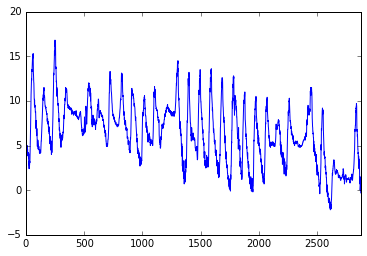

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# scrivi qui

meteo.Temp.plot()


**DA FARE 4.2**: Nello stesso grafico mostrare l'andamento della pressione e la quantità delle precipitazioni.



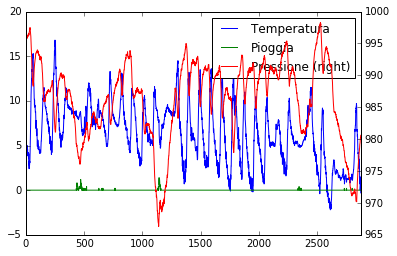

In [43]:
# scrivi qui

meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Pioggia.plot(label="Pioggia", legend=True)
meteo.Pressione.plot(secondary_y=True, label="Pressione", legend=True);

**DA FARE 4.3**: Calcolare la temperatura media giornaliera e mostrarla nel grafico.

**SUGGERIMENTO 1**: aggiungere la colonna `'Giorno'` estraendo solo il giorno dalla data. Per farlo usare la funzione `.str` applicata a tutta la colonna.

**SUGGERIMENTO 2**: Successivamente usare un ciclo `for` per ciclare sui giorni




CON GIORNO
               Data  Pressione  Pioggia  Temp      Giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


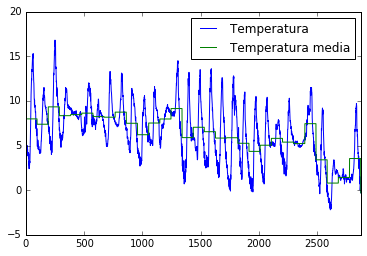

In [44]:
# scrivi qui

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]
print()
print("CON GIORNO")
print(meteo.head())
for giorno in meteo['Giorno']:
    temp_media_giorno = meteo[(meteo.Giorno == giorno)].Temp.values.mean()
    meteo.loc[(meteo.Giorno == giorno),'Temp_media_giorno']= temp_media_giorno
print()
print("CON TEMPERATURA MEDIA")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)

**DA FARE 4.4**: Prendi qualche tutorial che hai già fatto e dove hai caricato csv, e prova invece ad usare pandas. 

## GeoPandas


<div class="alert alert-warning">

**ATTENZIONE: Questa parte del tutorial è SPERIMENTALE, a breve aggiungeremo commenti**

</div>

Pandas è anche molto comodo per gestire dati geografici, con l'estensione [GeoPandas](http://geopandas.org/)

Installiamola subito:

Anaconda:

- `conda install geopandas`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user geopandas ```


## Un esempio semplice con GeoPandas

Faremo un esempio mostrando regioni italiane colorate in base alla popolazione residente:   

![](italy-population.png)

Quando si parla di mappe, tipicamente vogliamo mostrare delle regioni o nazioni colorate in base ad un valore associato ad ogni zona. Quindi servono sempre almeno due cose:

1. le forme geometriche delle zone da raffigurare
2. i valori da associare ad ogni zona da far corrispondere alle gradazioni di colore

Tipicamente questi dati vengono presi da almeno due dataset diversi, uno geografico e uno di statistiche, ma vi troverete spesso con il problema che nel dataset geografico le zone vengono chiamate con un nome o codice diverso da quello del dataset con le statistiche. 

Divideremo l'esempio in due parti: 

* nella prima, useremo tabelle già ripulite che trovate nella stessa cartella di questo foglio. Questo ci permetterà di comprendere i meccanismi di base di GeoPandas e del _fuzzy matching_

* nella seconda parte, proporremo di risolvere un esercizio completo che prevede lo scaricamento online del file html e pulizia 

Vediamo il nostro esempio, in cui le zone geografiche vengono prese dal sito dell'istat da file geografici in formato shapefile. Il file è già salvato nella cartella qui: [reg2011/reg2011_g.shp](reg2011/reg2011_g.shp) , se volete vedere dove era online guardate basi territoriali qua: https://www.istat.it/it/archivio/104317

### Leggere shapefiles in GeoPandas

Leggiamo con geopandas lo shapefile:

In [45]:
import geopandas as gpd

df_regioni = gpd.read_file(filename="reg2011/reg2011_g.shp")
df_regioni.head()  

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.3123314595 5145701.00031822, ..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.9989314592 5091965.000718219,..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"(POLYGON ((595736.1865314599 5163715.00141822,..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.0800314592 5219948.900018221,..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.0014314596 5175597.00131822, ..."


Oltre alla solita tabella di Pandas, notiamo che tra le colonne ci sono dei codice `COD_REG` per identificare le regioni, i loro nomi `NOME_REG` e la geometria `geometry`. Chiamando `plot()` sul dataframe di geopandas possiamo vedere la cartina risultante:

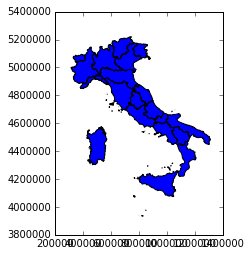

In [46]:
%matplotlib inline
df_regioni.plot()


### Prendiamo statistiche da visualizzare


Nel nostro esempio, estraiamo statistiche sulla popolazione delle regioni italiane da una pagina HTML. Metteremo poi i dati estratti in un dataframe Pandas (non GeoPandas) chiamato `df_popolazione`. Per comodità abbiamo salvato tale pagina nel file [popolazione.html](popolazione.html) (se volete vedere la versione online, andate su questo sito: https://www.tuttitalia.it/regioni/popolazione)

<div class="alert alert-warning">

**ATTENZIONE**: Per il momento puoi ignorare il codice che segue, ci serve solo per caricare i dati nel dataframe `df_popolazione`

</div>

In [47]:
import pandas as pd


# prende la riga di una tabella html, e ritorna un dizionario con i dati estratti
def estrai_dizionario(riga_html):
    colonne = riga_html.select('td')
    return dict(name=colonne[1].text,
                population=colonne[2].text.replace('.', '').replace(',', '.'),
                area=colonne[3].text.replace('.', '').replace(',', '.'))

# Estrae la popolazione per regione da popolazione.html, e restituisce un dataframe Pandas (non GeoPandas)
def estrai_popolazione():
    from bs4 import BeautifulSoup
    with open('popolazione.html', encoding='utf-8') as f:
        testo = f.read()        
        listona = []    # listona di dizionari, ogni dizionario rappresenta una riga
        # usiamo il parser html5lib invece di lxml perchè il sito è complesso 
        soup = BeautifulSoup(testo, 'html5lib')  
        righe_html = soup.select('table.ut tr')[1:21]
        for riga_html in righe_html:
            listona.append(estrai_dizionario(riga_html))
        return pd.DataFrame(listona)

# Scarica la pagina HTML della popolazione, e la salva nel file 'popolazione.html'
def scarica_popolazione():
    from bs4 import BeautifulSoup
    import requests

    r = requests.get("https://www.tuttitalia.it/regioni/popolazione/")
    if r.status_code == 200:
        testo = r.text
        with open('popolazione.html', 'w', encoding='utf-8') as f:
            f.write(testo)
            print("Ho salvato il file 'popolazione.html'")
    else:
        # se il codice non è 200, qualcosa è probabilmente andato storto
        # e blocchiamo l'esecuzione dello script        
        raise Exception('Errore durante lo scaricamento : %s' % r)     

# scarica_popolazione()

Vediamo qui il contenuto del file: 

In [48]:
df_popolazione = estrai_popolazione()
df_popolazione 

,area,name,population
0,23863.65,Lombardia,10019166
1,17232.29,Lazio,5898124
2,13670.95,Campania,5839084
3,25832.39,Sicilia,5056641
4,18345.35,Veneto,4906210
5,22452.78,Em.-Romagna,4448841
6,25387.07,Piemonte,4392526
7,19540.90,Puglia,4063888
8,22987.04,Toscana,3742437
9,15221.90,Calabria,1965128


Se compariamo i nomi in questa tabella con il dataframe della prima, notiamo subito che parecchi nomi non sono identici. Per esempio, nello shapefile troviamo `TRENTINO-ALTO ADIGE/SUDTIROL` mentre nelle statistiche c'è `Trentino-AA`. Volendo creare una tabella unica, occorrerà quindi fare integrazione dati cercando di ottenere un _matching_ tra le righe dei due dataset. Per venti regioni potremmo farla a mano ma chiaramente farlo per migliaia di righe sarebbe estremamente oneroso. Per agevolare questa operazione, ci conviene eseguire una cosiddetta _fuzzy join_, che cerca stringhe simili nei due dataset e in base ad un misura di similarità tra stringhe stabilisce come associare righe della prima tabella a righe della seconda.

Per 

In [50]:

def fuzzy_join(df_geo, df_right, name_left, name_right):
    """ Prende:
         - un data frame di geo pandas df_geo che contiene una colonna chiamata name_left 
         - un'altro dataframe generico df_right che contiene una colonna chiamata name_right
        Ritorna :
        - un nuovo dataframe che è la join dei due dataframe in base alla similirità tra 
          le colonne name_left e name_right
          
          ATTENZIONE: a volte l'agoritmo di similarità può confondersi e considerare uguale due nomi 
                      che invece dovrebbero essere distinti ! 
                      Per quanto possibile, verificare sempre i risultati manualmente.
    """
    from functools import partial
    from itertools import product
    import difflib
    import heapq
    #from pprint import pprint

    df1 = df_geo.set_index(name_left)
    df1.index = df1.index.str.lower()
    df2 = df_right.set_index(name_right)
    df2.index = df2.index.str.lower()


    def get_matcher_smart(dfl, dfr):
        heap = []
        for l, r in product(dfl.index, dfr.index):
            sm = difflib.SequenceMatcher(lambda x: ' .\n\t', l, r)
            heapq.heappush(heap, (1. - sm.quick_ratio(), l, r))
        ass_l, ass_r, ass_map = set(), set(), {}
        while len(ass_map) < len(dfl):
            score, l, r = heapq.heappop(heap)
            if not (l in ass_l or r in ass_r):
                ass_map[l] = r
                ass_l.add(l)
                ass_r.add(r)
        #pprint(ass_map)
        return dfl.index.map(lambda x: ass_map[x])

    df1.index = get_matcher_smart(df1, df2)

    return df1.join(df2)



In [51]:
tabellona = fuzzy_join(df_regioni, df_popolazione, 'NOME_REG', 'name')

tabellona

,COD_REG,SHAPE_Leng,SHAPE_Area,geometry,area,population
NOME_REG,,,,,,
piemonte,1,1.236869e+06,2.539410e+10,"POLYGON ((457832.3123314595 5145701.00031822, ...",25387.07,4392526
v. d'aosta,2,3.111651e+05,3.259041e+09,"POLYGON ((390734.9989314592 5091965.000718219,...",3260.90,126883
lombardia,3,1.411265e+06,2.386270e+10,"(POLYGON ((595736.1865314599 5163715.00141822,...",23863.65,10019166
trentino-aa,4,8.005341e+05,1.360802e+10,"POLYGON ((743386.0800314592 5219948.900018221,...",13605.50,1062860
veneto,5,1.057856e+06,1.840550e+10,"POLYGON ((768209.0014314596 5175597.00131822, ...",18345.35,4906210
friuli vg,6,6.674897e+05,7.864294e+09,(POLYGON ((852211.9935314599 5080672.915518221...,7924.36,1219191
liguria,7,8.342245e+05,5.415465e+09,"(POLYGON ((400403.6250314591 4851436.93751822,...",5416.21,1565307
em.-romagna,8,1.164723e+06,2.245147e+10,"(POLYGON ((760714.7476314595 4937319.39921822,...",22452.78,4448841
toscana,9,1.316658e+06,2.298443e+10,"(POLYGON ((593650.2500314591 4867988.00001822,...",22987.04,3742437


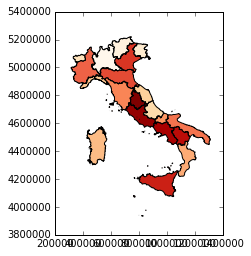

In [52]:
tabellona.plot(column='population', cmap='OrRd', edgecolor='k', legend=False)


## Esempio di integrazione completo

Poi per questo esempio in particolare, serviranno anche `requests`, `beautifulsoup4`, e `html5lib`. Installali così:


Anaconda:

- `conda install requests beautifulsoup4 html5lib`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user requests beautifulsoup4 html5lib ```


Per fare un esempio di integrazione, useremo una pagina HTML con i dati delle regioni italiane:

* https://www.tuttitalia.it/regioni/popolazione/

Per capire come estrarre la popoloziona dall'HTML, guarda il tutorial sull'[estrazione](https://softpython.readthedocs.io/it/latest/exercsies/extraction/extraction-solution.html)


Nel menu basi territoriali qua invece abbiamo dei file geografici in formato shapefile delle regioni: 

* basi territoriali https://www.istat.it/it/archivio/104317

